In [3]:
# loading some libraries

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy as sp
import scipy.stats as st
from math import sqrt
print("Modules Imported!")

Modules Imported!


### A simple Bayesian Network: Conditional and joint distributions
Let us construct a simple network in which Traffic and Charlie influence Bob being on time or not as discussed in class. One of the goals of this excercise is just to get used to Numpy arrays. 

We let

In [193]:
TrafficPD = np.zeros(2)
TrafficPD[0] = .65
TrafficPD[1] = 1 - TrafficPD[0]

CharliePD = np.zeros(2)
CharliePD[0] = .9
CharliePD[1] = 1 - CharliePD[0]

BobCPD = np.zeros((2,2,2)) # 1st index Bob, 2nd index Charlie, 3rd index Traffic: BobCPD(i,j,k) = Pr(B=i|C=j,T=k)
BobCPD[1] = [[0.1,1/3],[1/4,1]]
BobCPD[0] = 1 - BobCPD[1]

Find the following quantities: 
- joint probability distribution for all variables
- $\Pr(T=1\mid B=1)$
- $\Pr(T=1\mid B=1,C=1)$

In [ ]:
AllPD = np.zeros((2,2,2)) # AllPD(i,j,k) = Pr(B=i,C=j,T=k)
# ...

## MRF denoising
In this excercise, we will use an iterative approach to denoise an image. 

The first code segment below allows us to plot an image that is represented by a square Numpy binary array. Each cell of the array represents a "pixel". The second generates and plots such an image. We then add to this image some noise. 

In [4]:
def draw(A):
    n = len(A)
    fig,ax = plt.subplots()
    ax.set_aspect("equal")
    for i in range(n):
        for j in range(n):
            if A[i,j]==1:
                ax.add_patch(
                    patches.Rectangle(
                        (i/n, j/n),
                        1/n,
                        1/n
                    )
                )


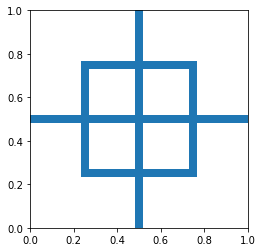

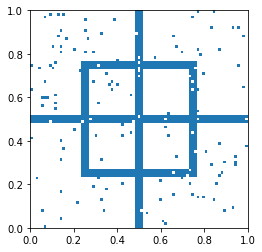

In [19]:
a = 20 # when testing choose a smaller number for a, say a = 6, for faster computation
n = 4*a+1
x = np.zeros((n,n))
x[:,2*a-1:2*a+2] = 1
x[a-1:3*a+2,a-1:a+2] = 1
x[a-1:3*a+2,3*a-1:3*a+2] = 1
x = x + np.transpose(x)
x = x>0
N = st.bernoulli.rvs(0.02,size=(n,n))
y = np.mod(x + N, 2)

# switching from {0,1} to {-1,+1}
x = 2*x-1
y = 2*y-1
draw(x)
draw(y)

Now suppose that the true image and its noisy version have a joint Boltzmann distribution, $\Pr(x,y)=e^{-E(x,y)}$, with energy function $E(x,y) = -\sum_{i,j} x_ix_j - 2 \sum_i x_iy_i$, where the range of the first sum is over adjacent pixels. 

Write a function that denoises the noisy image $y$ as follows. This is done by first setting $\hat x = y$ and then at each step, a pixel is chosen, i.e., some $\hat x_i$. The value of $\hat x_i$ is chosen so that $\Pr(\hat x, y)=e^{-E(\hat x,y)}$ is maximized. The order of pixels that are chosen may be arbitrary but here let us choose them by scanning each row, and go through the whole image a couple of times. Denoise $y$ and plot both $\hat x$ and $y$.

In [20]:
def denoise(y):
    xhat = np.copy(y) # need to create a copy so that y is not altered. Python is weird that way!
    # ...
    return xhat

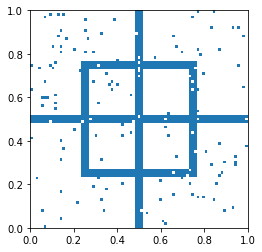

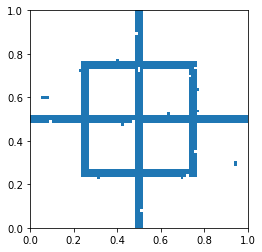

In [21]:
draw(y)
xhat = denoise(y)
draw(xhat)